In [5]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
df = pd.read_csv('share-of-the-population-with-access-to-electricity.csv')

world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world.columns = ['pop_est', 'continent', 'name', 'Code', 'gdp_md_est', 'geometry']

df = df[df['Year'] == 2019]

merge = pd.merge(world, df, on='Code')
result = merge.drop(['continent', 'name', 'gdp_md_est', 'pop_est', 'Year', 'Entity'], axis=1)

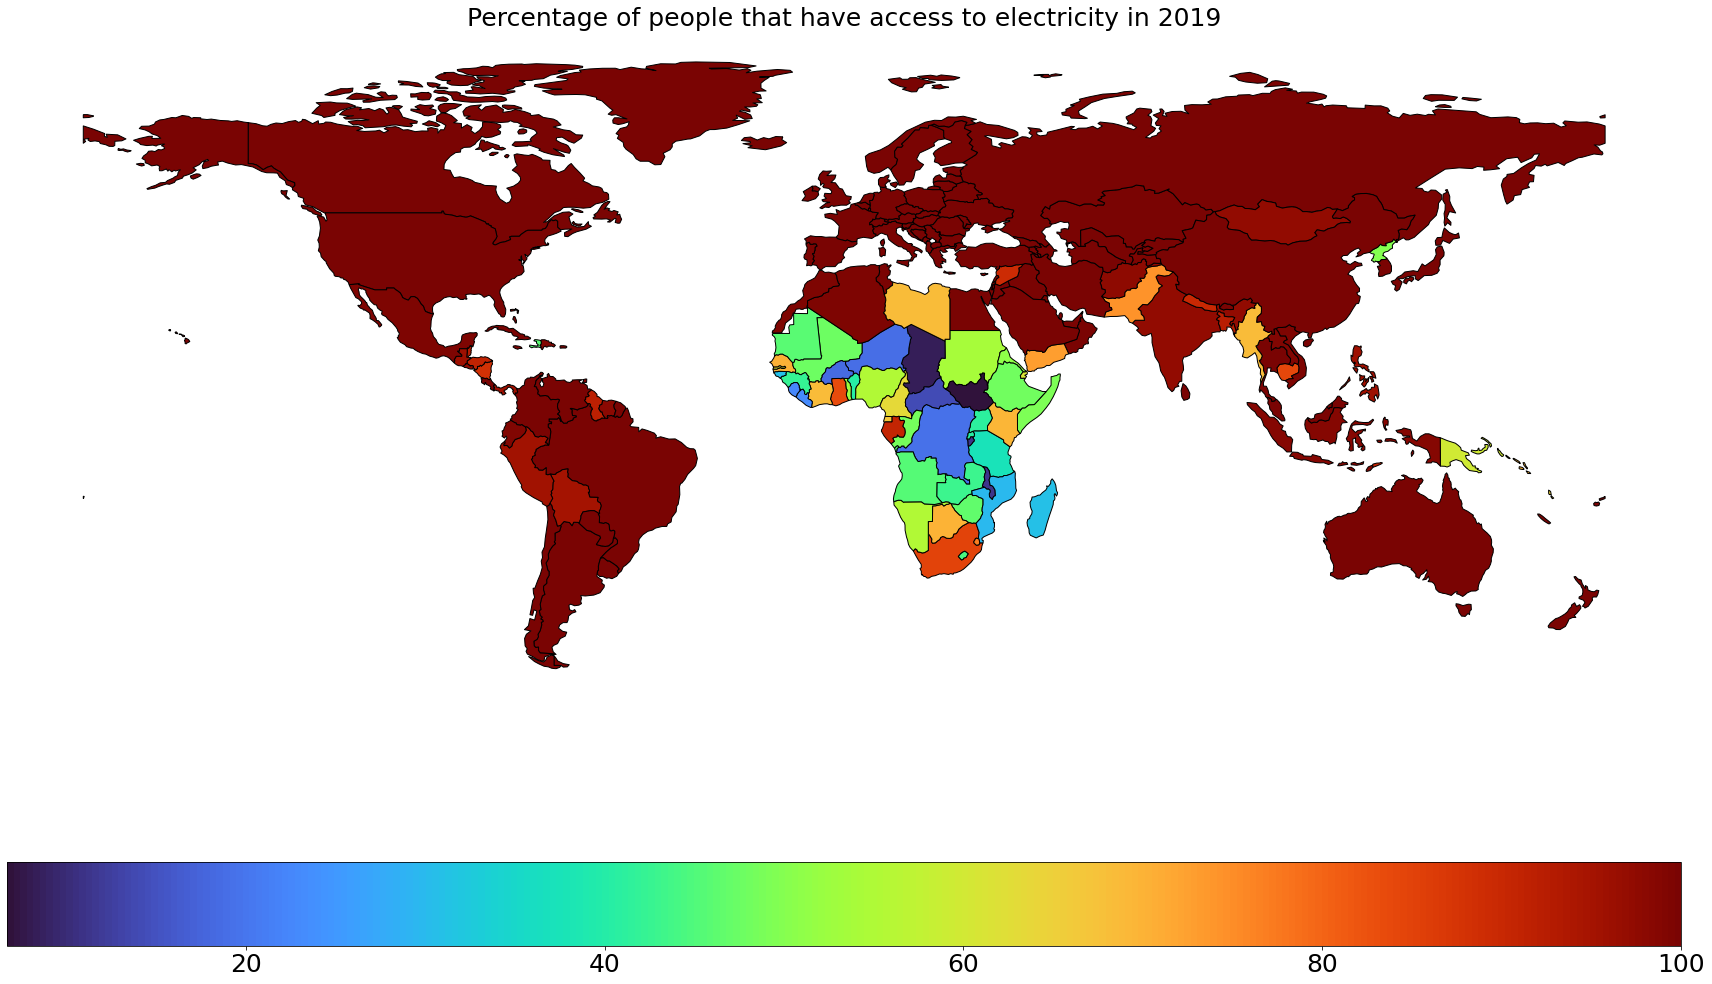

In [4]:
fig, axis = plt.subplots(1, figsize=(30,20))
result.plot(ax=axis, column='Access to electricity (% of population)', legend=True, 
            legend_kwds={'orientation': "horizontal"}, 
            cmap='turbo', edgecolor='black')
plt.title("Percentage of people that have access to electricity in 2019", fontsize=25)
axis.set_axis_off();

fig = axis.figure
cb = fig.axes[1]
cb.tick_params(labelsize=25)

plt.savefig('Percentage of people that have access to electricity in 2019.jpg', dpi=300, bbox_inches='tight')
plt.show()